
 # **Evaluating Water Potability** 
 ### By Group 21 


Clean water is an essential ingredient for a healthy human life. However, at least 2 billion people use a contaminated drinking water source, and approximately 297,000 children less than five years old die globally due to the pathogens present in water. Particularly, water quality in Nigeria has been affecting the health of children. The United Nations (UN) and World Health Organization (WHO) recognize that safe and readily available water and better management of water resources can contribute greatly to poverty reduction in third world countries.
Currently, 30 UN entities have successfully developed partnerships with 40 international organizations to accomplish this goal. 

Dr. Doe has been the head of WHO since 2017 and he has had the chance to monitor the health of several children suffering from waterborne diseases in Nigeria. Recently, Dr. Doe, along with his team of health associates have started their journey to explore the causes of unsafe drinking water in Nigeria, where they aim to explore the following question: **How can the chemical composition of water help scientists predict water potability in Nigeria?**


## Preliminary Analysis 

To answer this question, we have retrieved a dataset from kaggle.com which is called Water Potability Dataset. It contains water quality metrics such as pH value, hardness, solids (total dissolved solids), chloramines, sulfate, conductivity, total organic carbon, trihalomethanes, turbidity, and potability, which we can use to evaluate and predict the water potability for 3, 276 different water bodies. It is a tidy dataset as it meets all three characteristics of tidy data – each row is a single observation, each column is a single variable and each value is a single cell. However, there are some NA values in the Sulfate column that we will filter out so that it doesn’t cause us problems in our data analysis. 

### 1. Reading and Loading Data

In [4]:
# install required package
install.packages('corrplot')
install.packages('naniar')

# import the libraries we need and set seed value 
library(tidyverse)
library(repr)
library(tidymodels)
library(corrplot)
library(gridExtra)
library(naniar)

options(repr.matrix.max.rows = 6)
set.seed(1)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [6]:
# read dataset from the web (our github repository)
# dataset source: https://www.kaggle.com/adityakadiwal/water-potability
url <- 'https://raw.githubusercontent.com/ricardoliu99/dsci100-group21/main/water_potability.csv'

# download dataset file using download.file 
download.file(url, 'water_potability.csv')

water <- read_csv('water_potability.csv') %>% mutate(Potability = as.factor(Potability))
water

Parsed with column specification:
cols(
  ph = col_double(),
  Hardness = col_double(),
  Solids = col_double(),
  Chloramines = col_double(),
  Sulfate = col_double(),
  Conductivity = col_double(),
  Organic_carbon = col_double(),
  Trihalomethanes = col_double(),
  Turbidity = col_double(),
  Potability = col_double()
)



ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
NA,204.8905,20791.32,7.300212,368.5164,564.3087,10.37978,86.99097,2.963135,0
3.716080,129.4229,18630.06,6.635246,NA,592.8854,15.18001,56.32908,4.500656,0
8.099124,224.2363,19909.54,9.275884,NA,418.6062,16.86864,66.42009,3.055934,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
9.419510,175.7626,33155.58,7.350233,NA,432.0448,11.03907,69.84540,3.298875,1
5.126763,230.6038,11983.87,6.303357,NA,402.8831,11.16895,77.48821,4.708658,1
7.874671,195.1023,17404.18,7.509306,NA,327.4598,16.14037,78.69845,2.309149,1


### 2. Splitting the data into training and testing set 

We are choosing to split our dataset into 60% training data and 40% testing data. 

In [8]:
# split data into 60% training data and 40% test data
water_split <- initial_split(water, prop = 0.60, strata = Potability)
water_train <- training(water_split)
water_test <- testing(water_split)
water_train
water_test

ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
NA,204.8905,20791.32,7.300212,368.5164,564.3087,10.37978,86.99097,2.963135,0
3.716080,129.4229,18630.06,6.635246,NA,592.8854,15.18001,56.32908,4.500656,0
8.099124,224.2363,19909.54,9.275884,NA,418.6062,16.86864,66.42009,3.055934,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
7.808856,193.5532,17329.80,8.061362,NA,392.4496,19.90323,NA,2.798243,1
5.126763,230.6038,11983.87,6.303357,NA,402.8831,11.16895,77.48821,4.708658,1
7.874671,195.1023,17404.18,7.509306,NA,327.4598,16.14037,78.69845,2.309149,1


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
9.092223,181.1015,17978.99,6.546600,310.1357,398.4108,11.55828,31.99799,4.075075,0
8.635849,203.3615,13672.09,4.563009,303.3098,474.6076,12.36382,62.79831,4.401425,0
7.119824,156.7050,18730.81,3.606036,282.3441,347.7150,15.92954,79.50078,3.445756,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
8.372910,169.0871,14622.75,7.547984,NA,464.5256,11.08303,38.43515,4.906358,1
6.069616,186.6590,26138.78,7.747547,345.7003,415.8870,12.06762,60.41992,3.669712,1
9.419510,175.7626,33155.58,7.350233,NA,432.0448,11.03907,69.84540,3.298875,1


### 3. Analyzing the dataset 

Part of conducting a good data analysis is figuring out the length and metrics of our dataset. Here we count the number of rows per class, mean, max and min for each column, as well as the number of rows with at least one N/A. 

In [10]:
# count number of observations for each class in training data by grouping potability column
class_count <- water_train %>% 
    group_by(Potability) %>% 
    summarize(counts = n()) %>% 
    mutate(proportion = 100*counts/nrow(water_train))
class_count

# calculate mean of each predictor variable

predictor_means <- water_train %>%
    select(-Potability) %>% 
    map_df(mean, na.rm = TRUE)
predictor_means

# calculate max of each predictor variable
predictor_max <- water_train %>%
    select(-Potability) %>% 
    map_df(max, na.rm = TRUE)
predictor_max

# calculate min of each predictor variable
predictor_min <- water_train %>%
    select(-Potability) %>% 
    map_df(min, na.rm = TRUE)
predictor_min

# count number of observation with at least one missing value (NA)
missing_rows <- water_train %>%
    filter(is.na(ph) | is.na(Hardness) | is.na(Solids) | is.na(Chloramines) | 
           is.na(Sulfate) | is.na(Conductivity) | is.na(Organic_carbon) | 
           is.na(Trihalomethanes) | is.na(Turbidity)) %>% 
    nrow()

str_c('There are ', missing_rows, ' missing rows in the dataset.')

`summarise()` ungrouping output (override with `.groups` argument)



Potability,counts,proportion
<fct>,<int>,<dbl>
0,1199,60.98678
1,767,39.01322


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.08322,196.8623,22173.83,7.102138,334.0765,428.6891,14.31388,66.62283,3.965576


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14,323.124,61227.2,13.127,476.5397,708.2264,28.3,120.0301,6.739


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,81.7109,320.9426,0.352,129,181.4838,2.2,0.738,1.45


[1] "There are 793 missing rows in the dataset."

The graph below represents the missing values per column in the dataset.

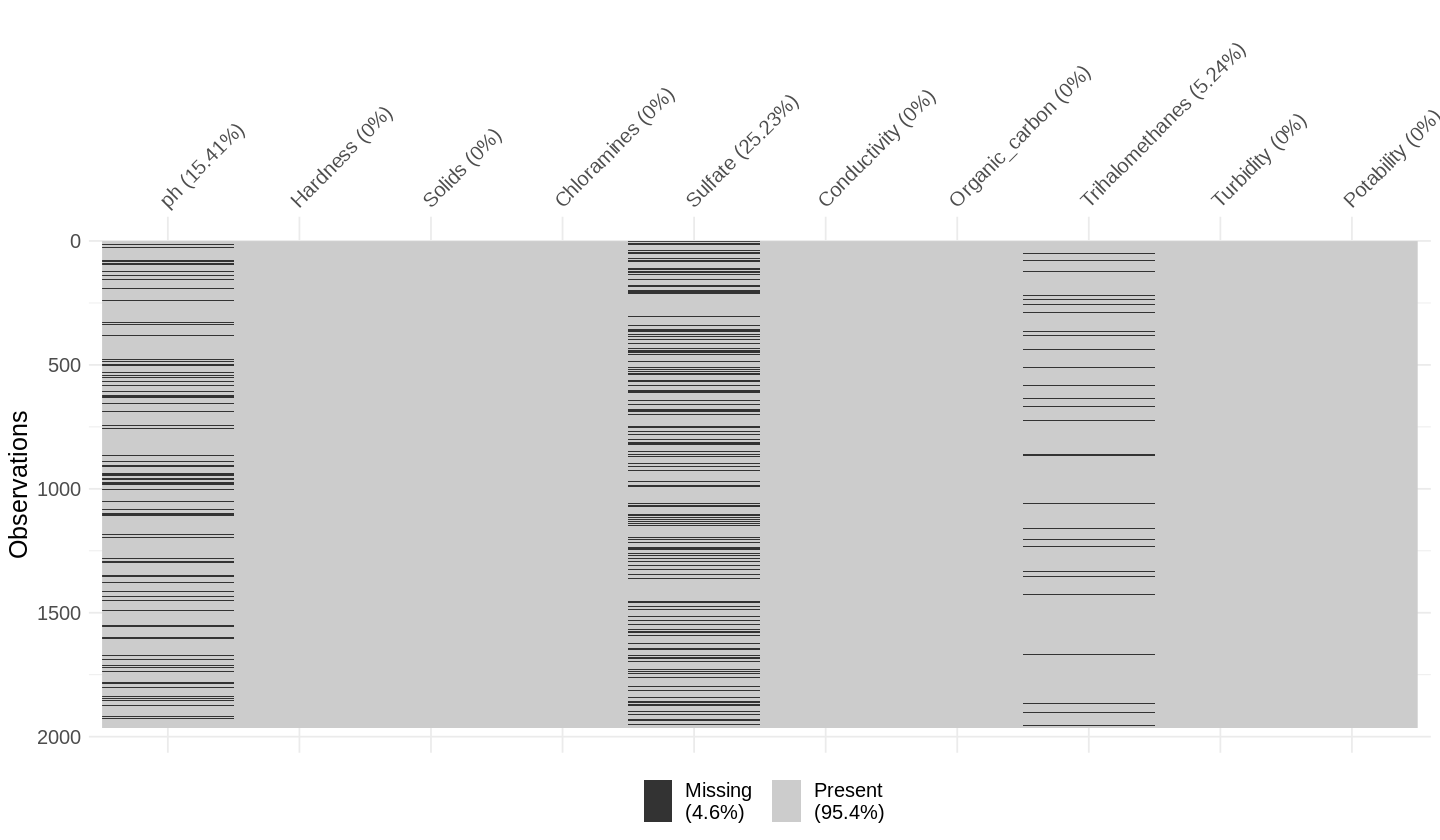

In [12]:
options(repr.plot.width=12, repr.plot.height=7)
vis_miss(water_train) +
theme(text = element_text(size=15)) 

### 4. Evaluating frequency and distribution of our predictors

Now, we will use histograms and box plots to determine the frequency as well as distribution of each variable in our dataset with respect to our target variable (Potability). We will then observe how different distributions of variables affects potability in water. This will help us plan how to visualize the results of our analysis in our final report.

Warning message:
“Removed 303 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 496 rows containing non-finite values (stat_bin).”


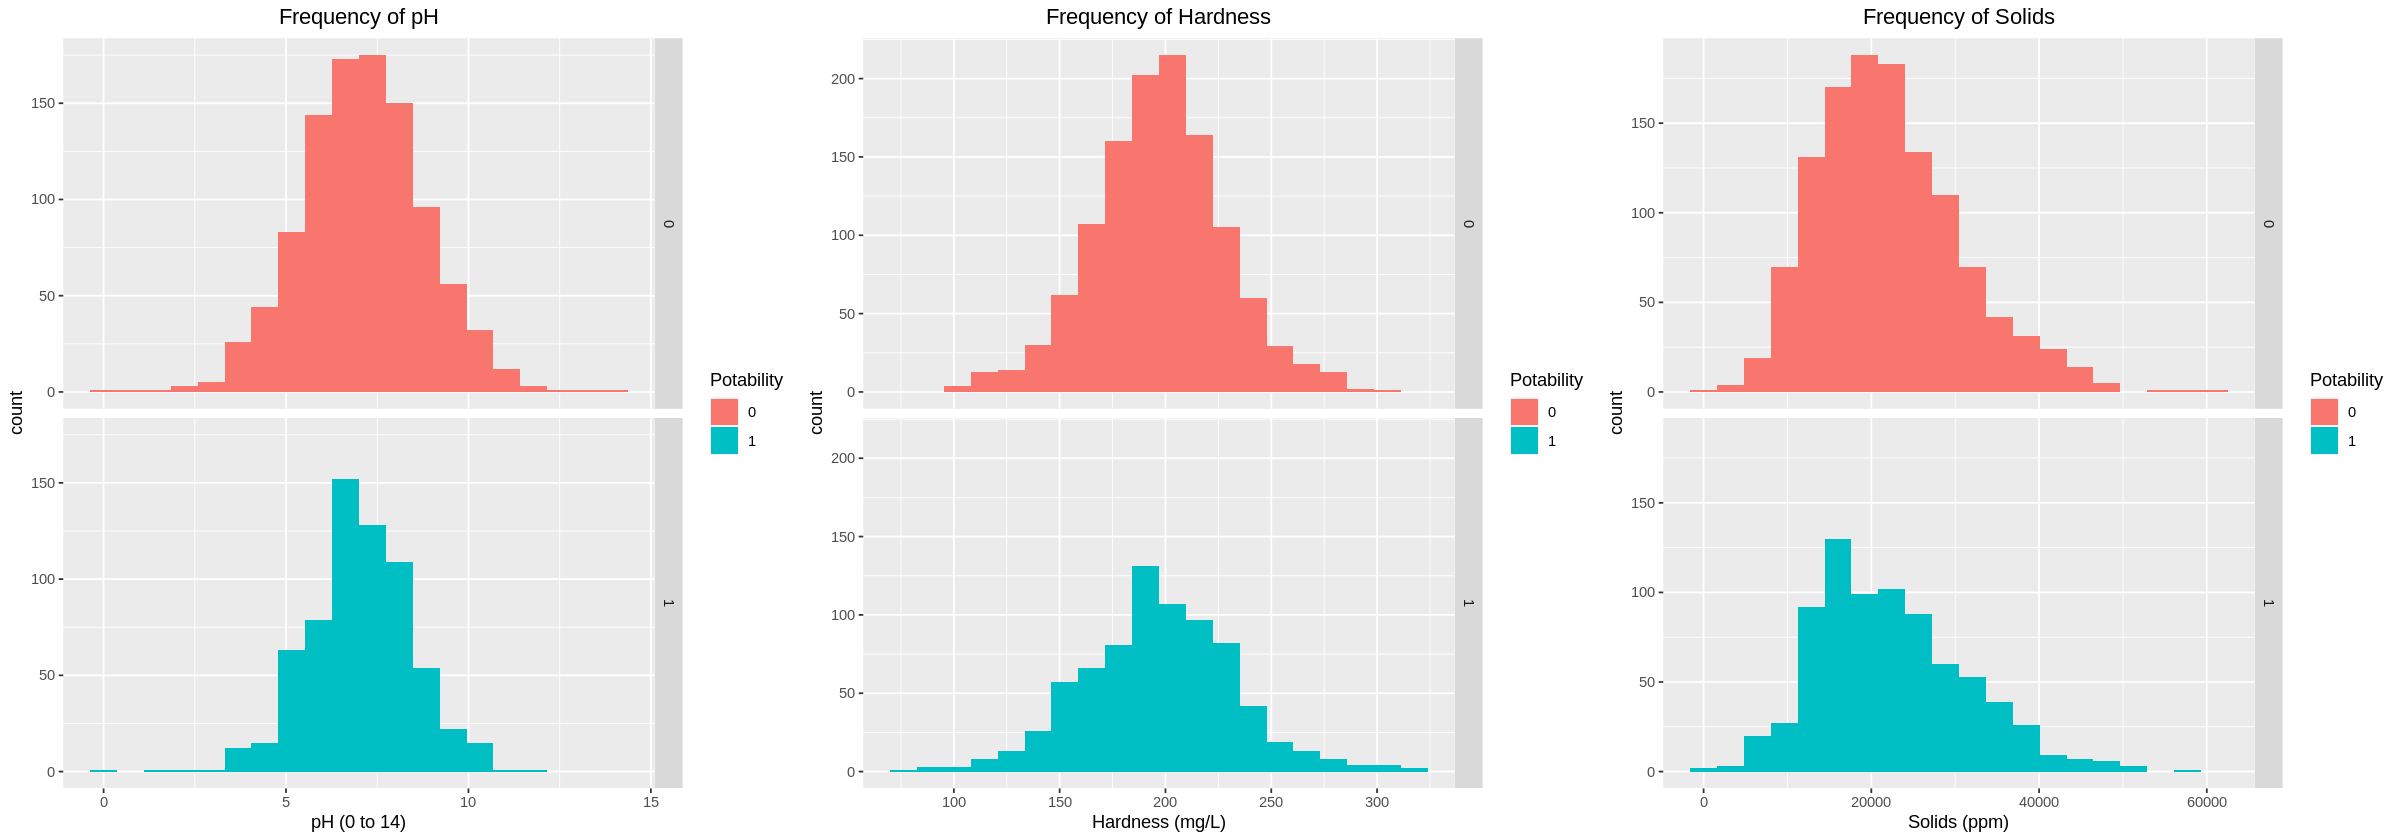

Warning message:
“Removed 103 rows containing non-finite values (stat_bin).”


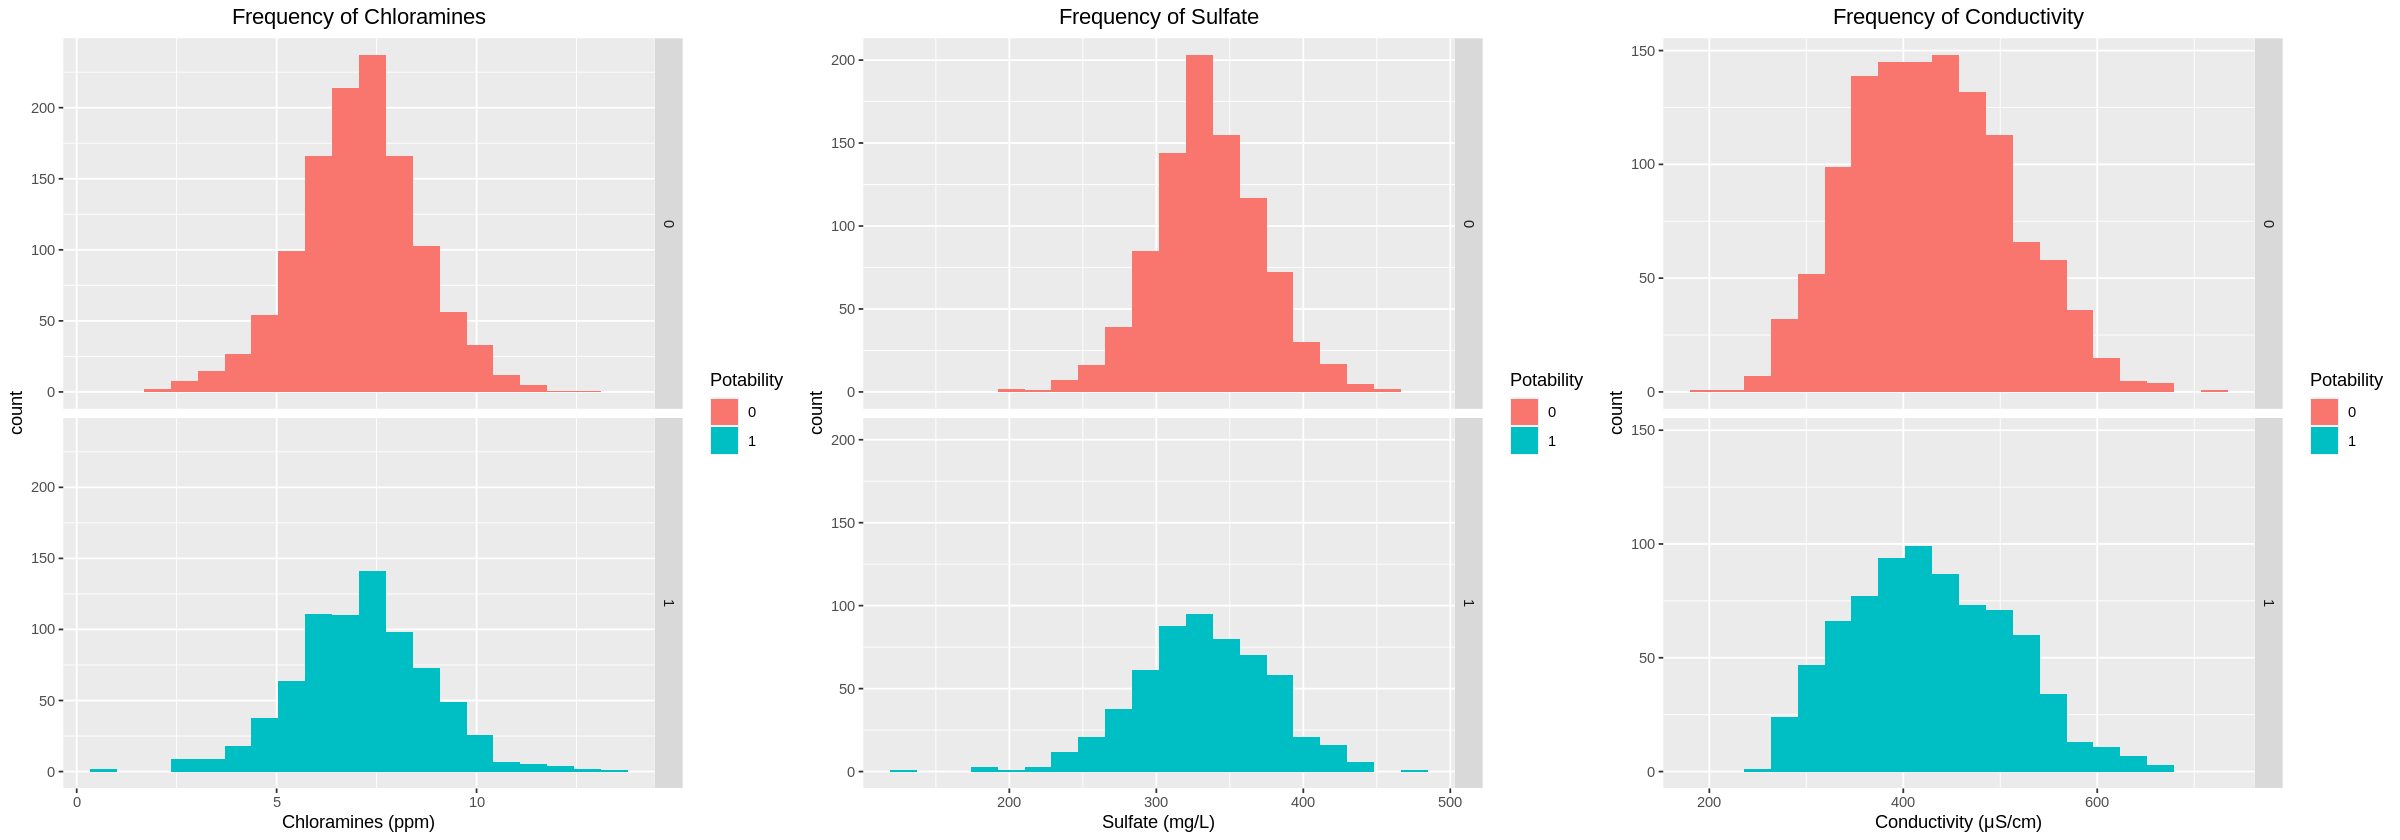

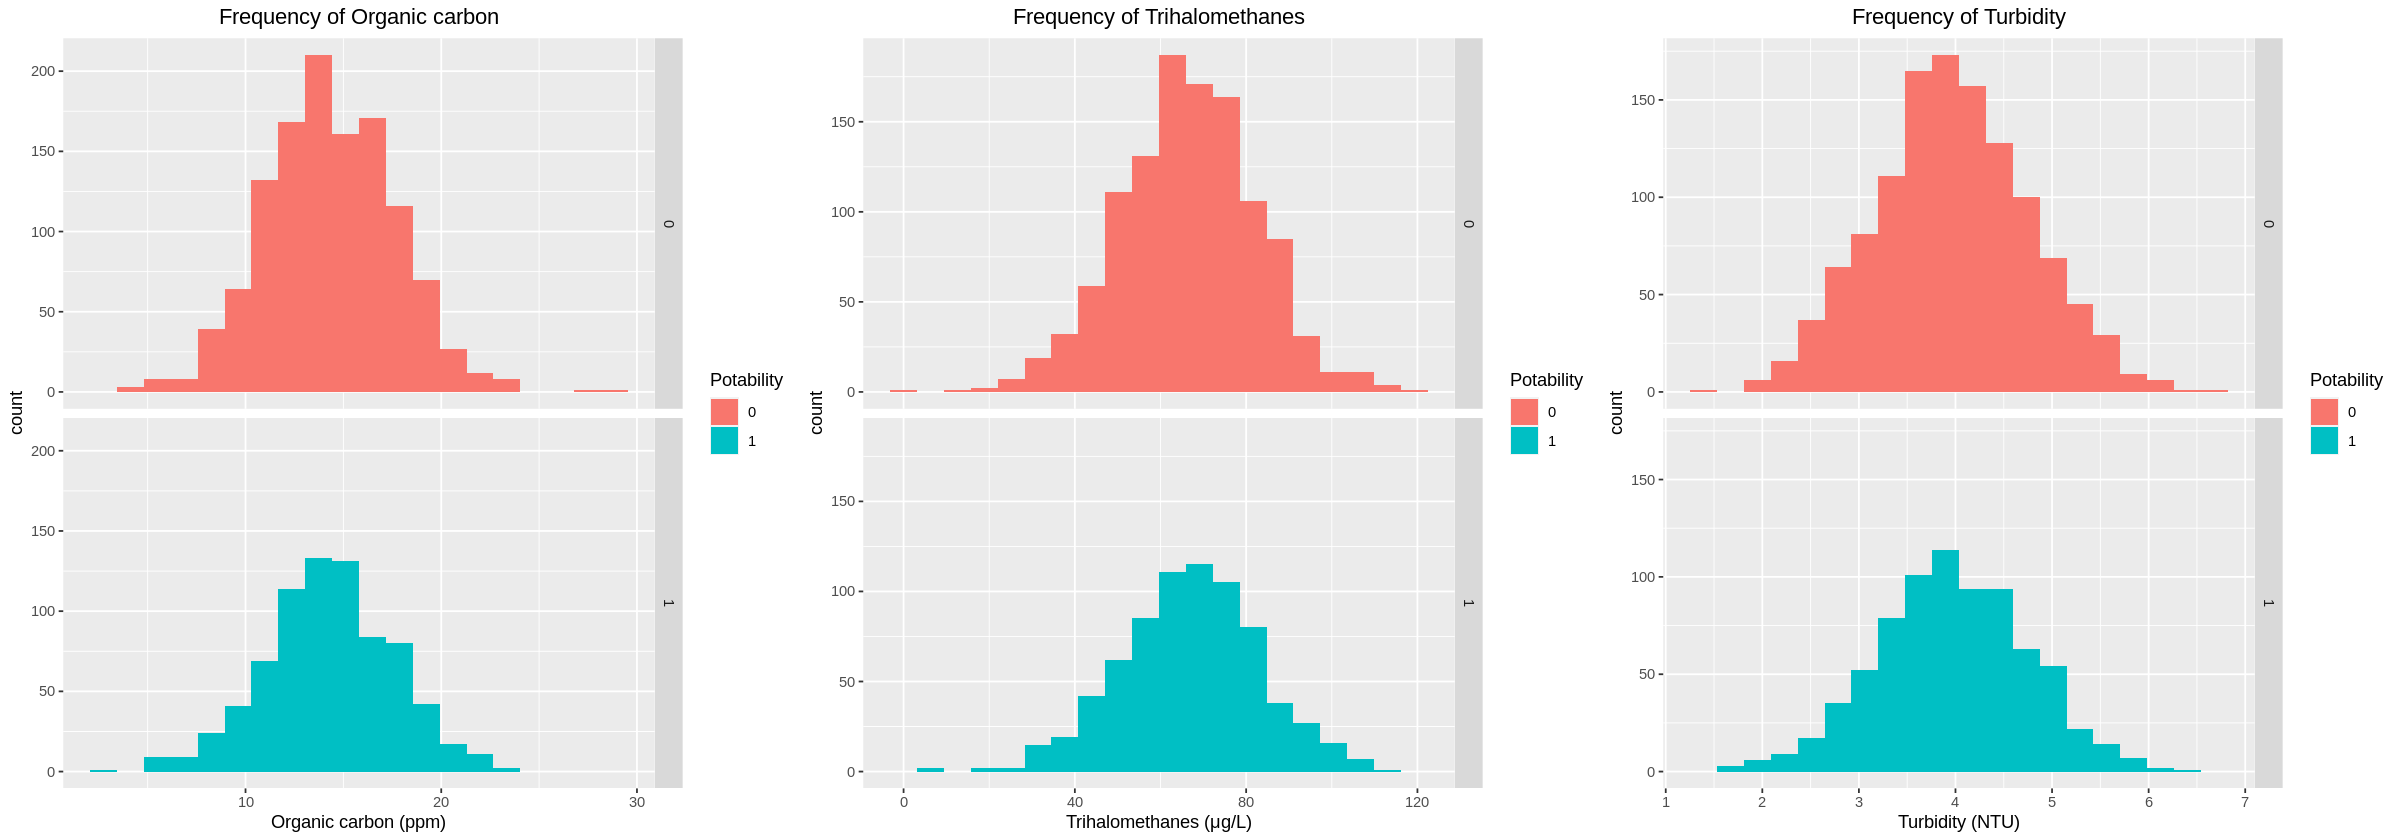

In [14]:
options(repr.plot.width=20, repr.plot.height=7)
# create histogram for each column separated by its Potability label
water_cols <- names(water)
cols_units <- c("pH (0 to 14)", "Hardness (mg/L)", "Solids (ppm)", "Chloramines (ppm)",
               "Sulfate (mg/L)", "Conductivity (μS/cm)", "Organic carbon (ppm)",
               "Trihalomethanes (μg/L)", "Turbidity (NTU)")
histogram_titles <- c("Frequency of pH", "Frequency of Hardness", "Frequency of Solids", "Frequency of Chloramines",
                     "Frequency of Sulfate", "Frequency of Conductivity", "Frequency of Organic carbon",
                     "Frequency of Trihalomethanes", "Frequency of Turbidity")

create_histogram = function(data_train, cols, units, titles, index) {
    histogram_plt <- ggplot(data_train, aes_string(x = cols[index])) +
        geom_histogram(aes(fill = Potability), bins=20) +
        labs(x=units[index]) + 
        ggtitle(titles[index]) +
        theme(plot.title = element_text(hjust = 0.5)) +
        facet_grid(rows=vars(Potability))
    return(histogram_plt)
}
for (col in seq(1,9,by=3)) { 
    histogram_plt1 <- create_histogram(water_train, water_cols, cols_units, histogram_titles, col)
    histogram_plt2 <- create_histogram(water_train, water_cols, cols_units, histogram_titles, col+1)
    histogram_plt3 <- create_histogram(water_train, water_cols, cols_units, histogram_titles, col+2)
    grid.arrange(histogram_plt1, histogram_plt2, histogram_plt3, ncol=3)
}

Using a box plot we visualise the distribution of each variable in our data set with respect to our target variable, i.e. Potability.

Warning message:
“Removed 303 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 496 rows containing non-finite values (stat_boxplot).”


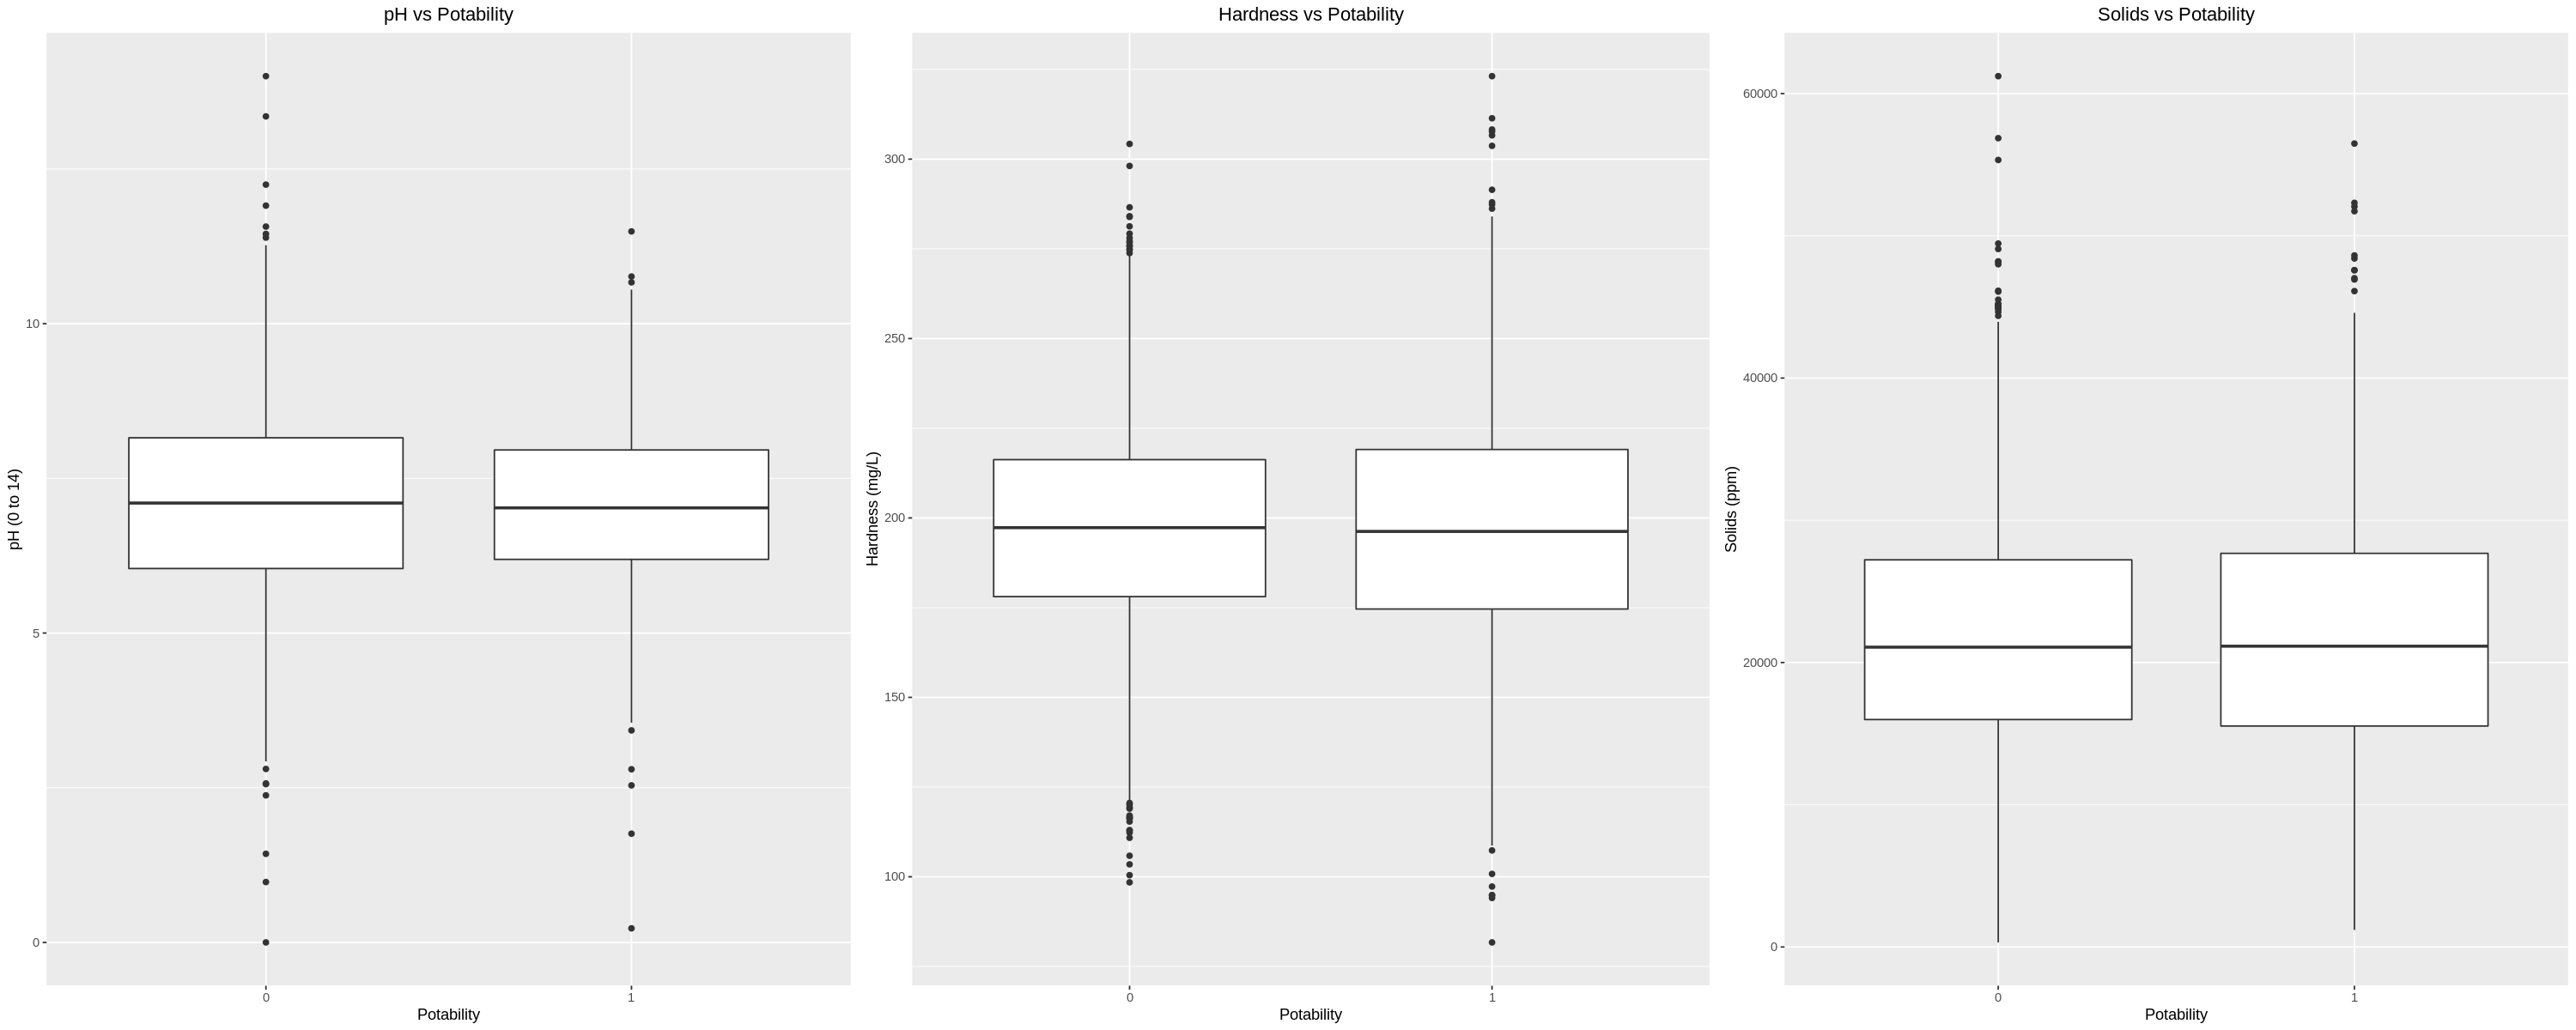

Warning message:
“Removed 103 rows containing non-finite values (stat_boxplot).”


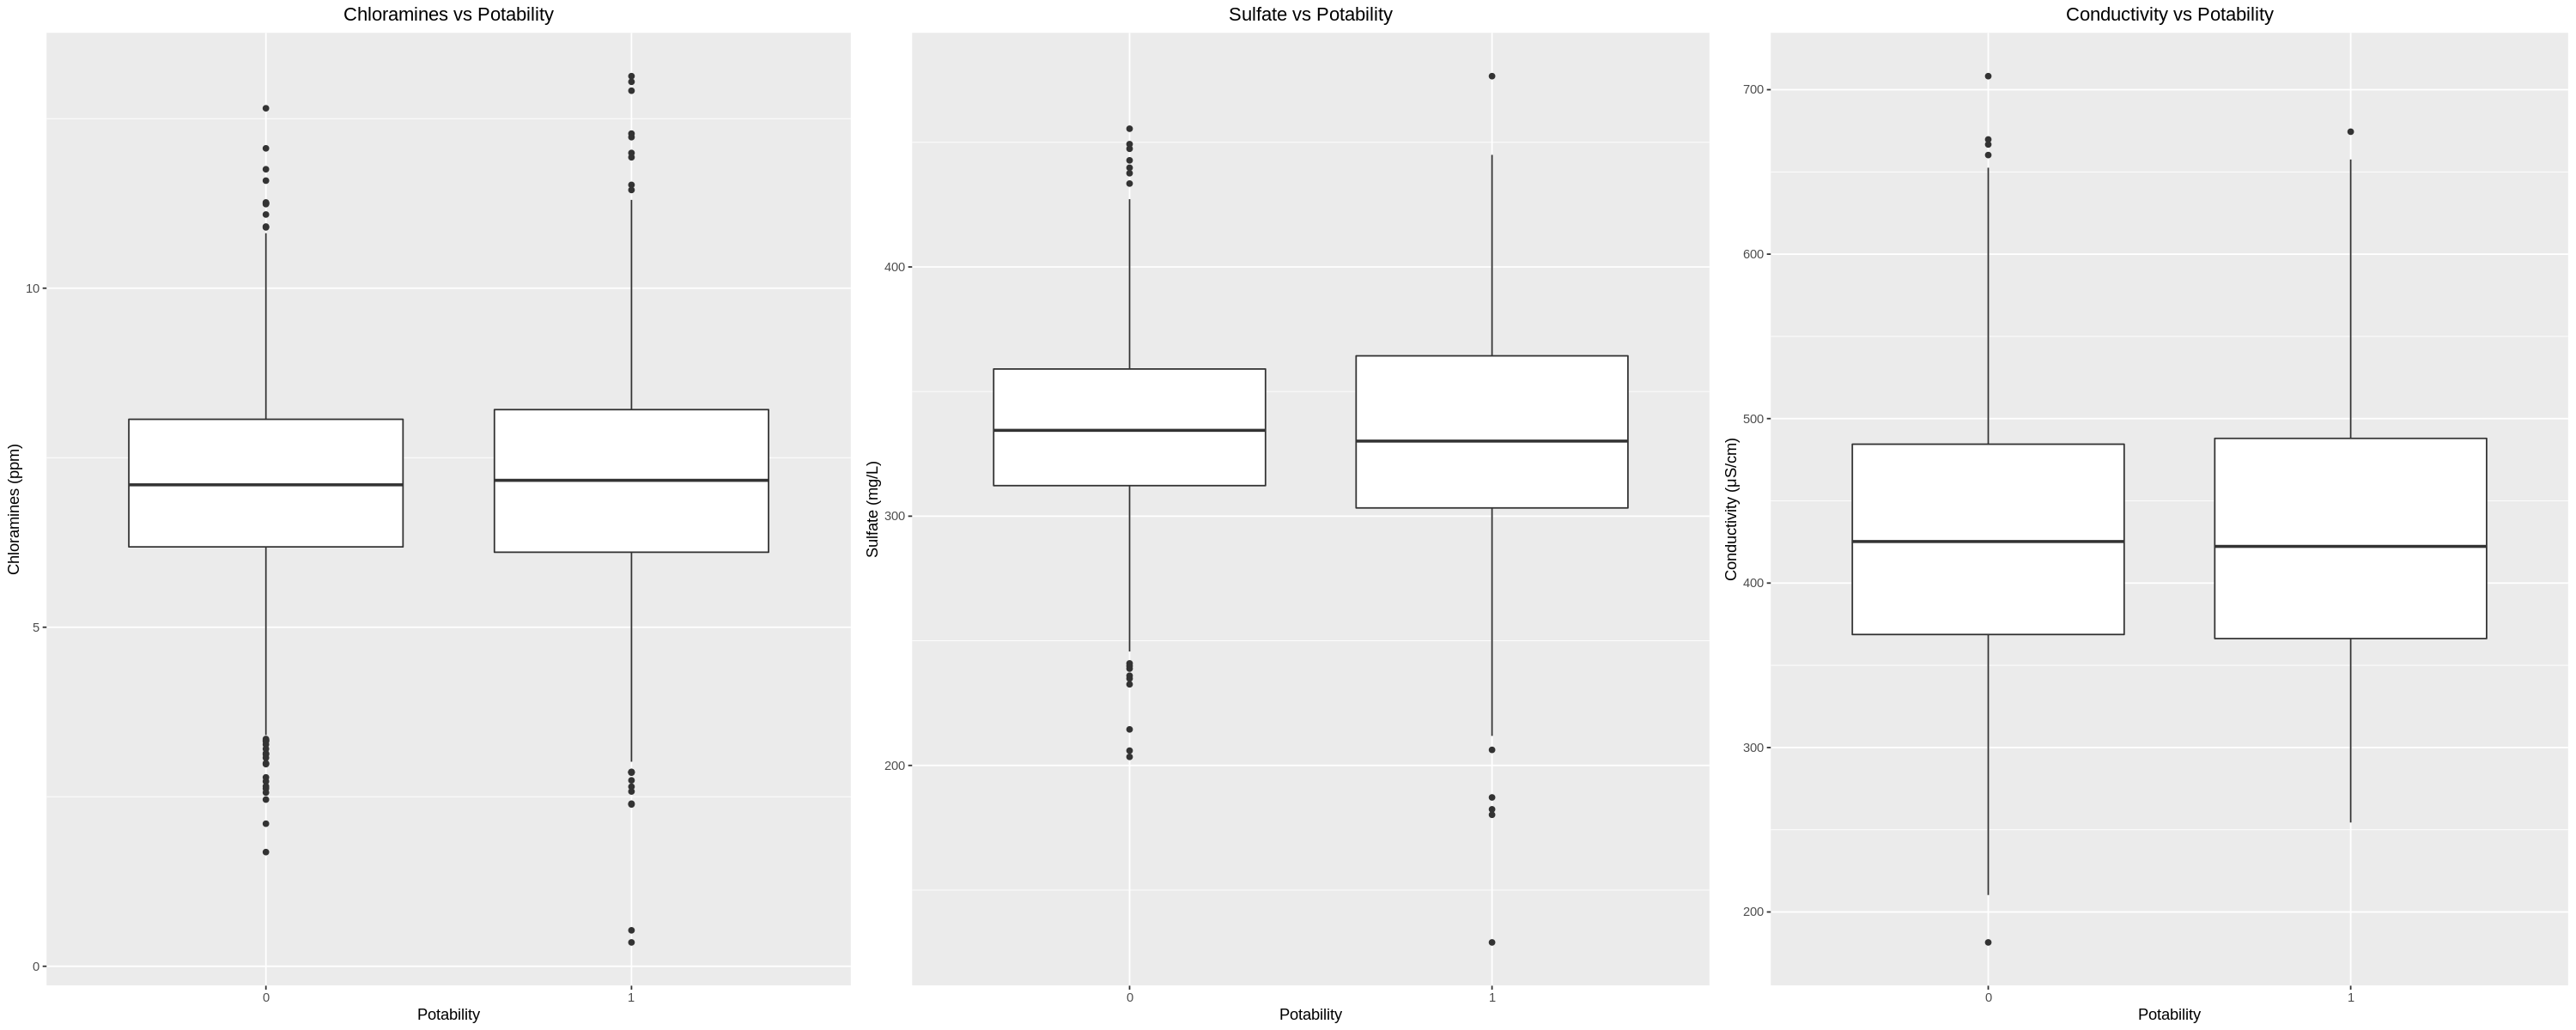

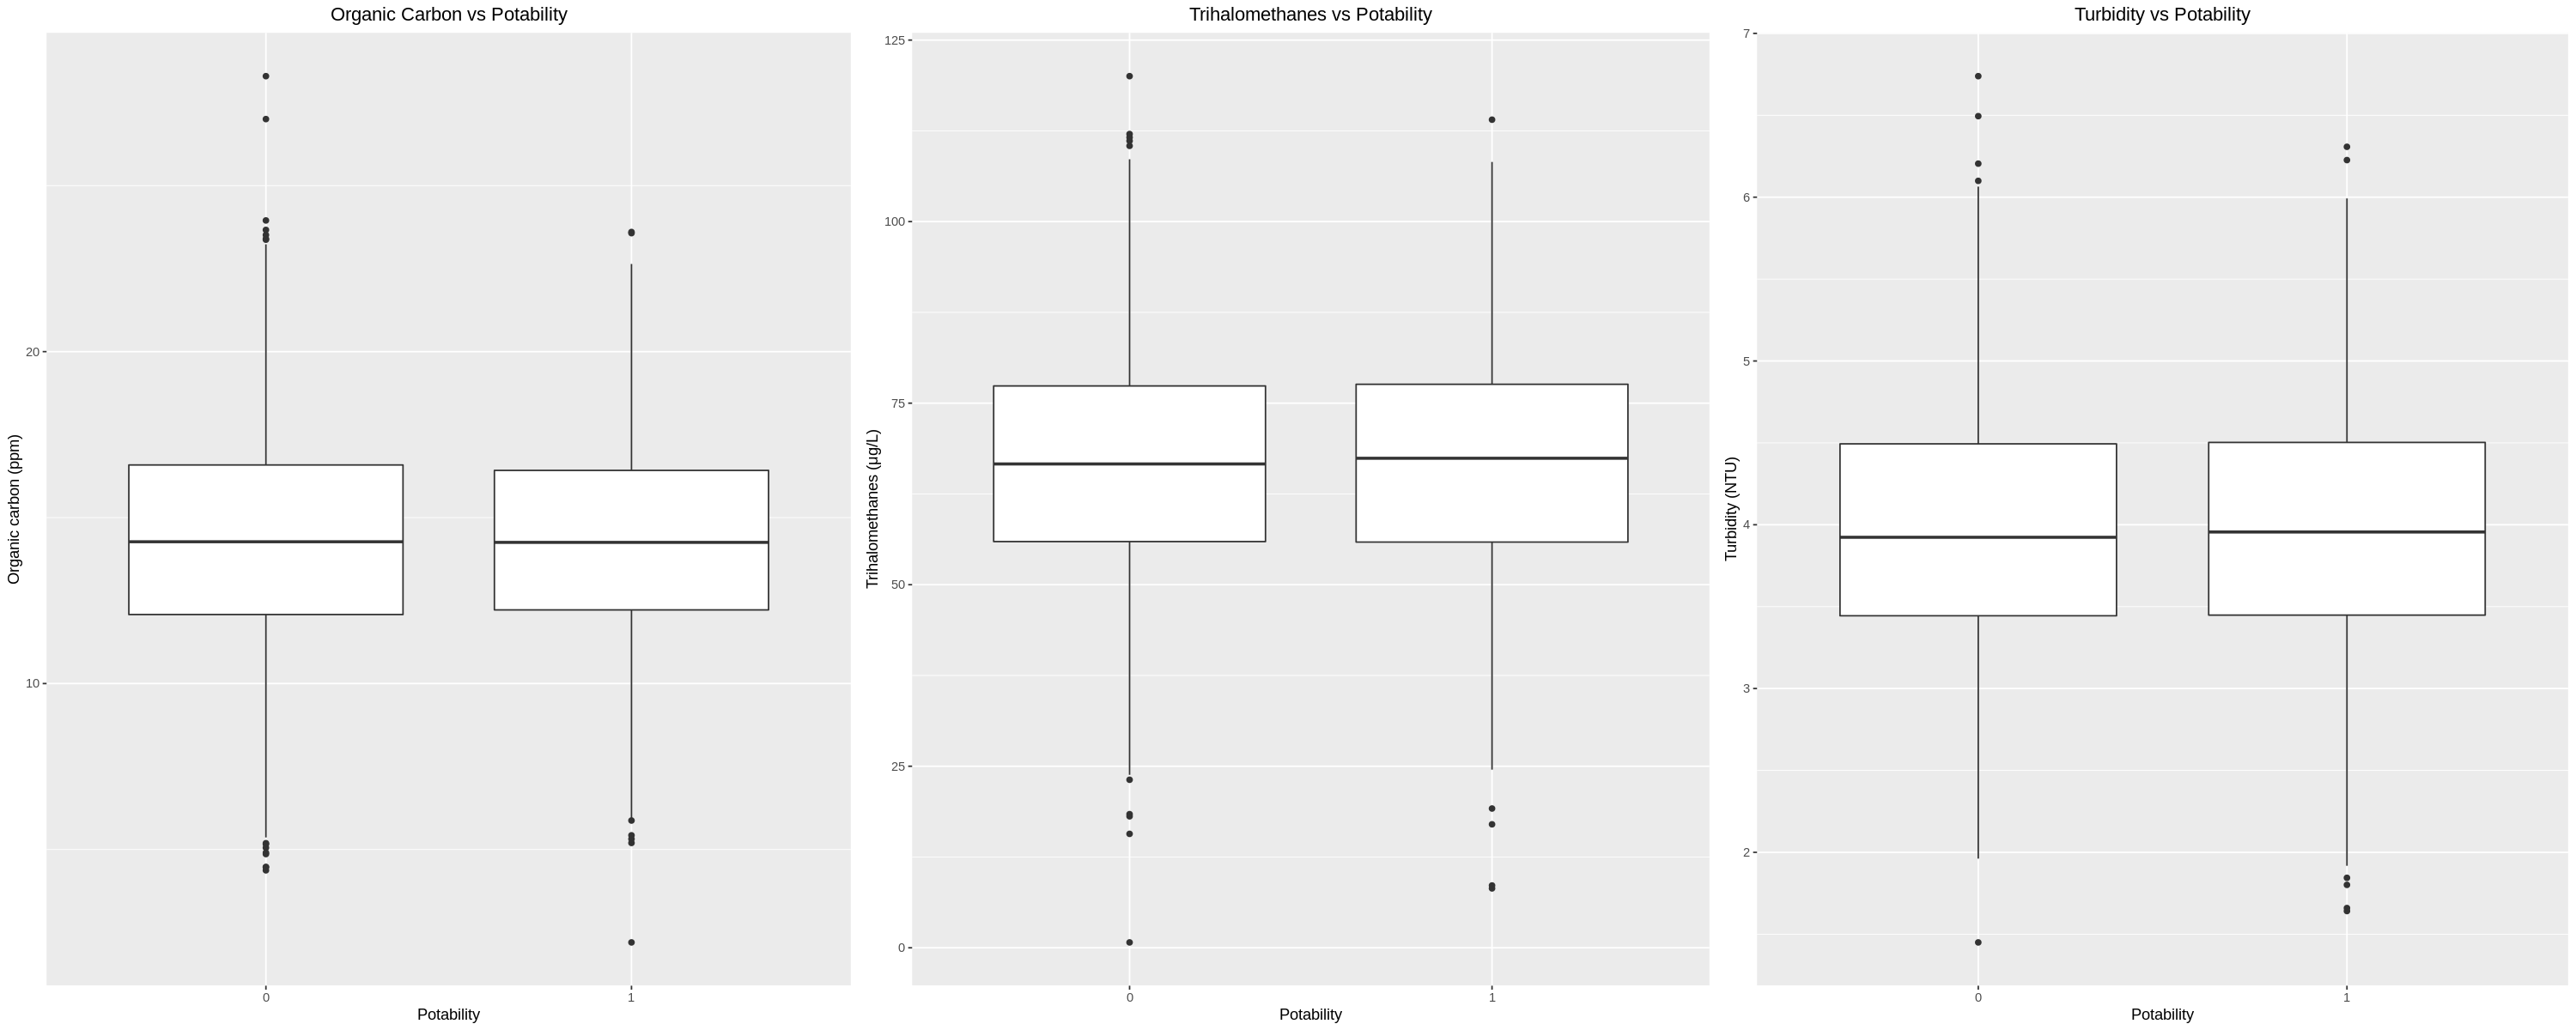

In [16]:
boxplot_titles <- c("pH vs Potability", "Hardness vs Potability", "Solids vs Potability", "Chloramines vs Potability",
                    "Sulfate vs Potability", "Conductivity vs Potability", "Organic Carbon vs Potability",
                   "Trihalomethanes vs Potability", "Turbidity vs Potability")

options(repr.plot.width = 25, repr.plot.height = 10)

create_boxplot <- function(data_train, cols, units, titles, index) {
    boxplt <- ggplot(data_train, aes_string(x="Potability", y=cols[index])) +
    geom_boxplot()  +
    labs(y = units[index]) + 
    ggtitle(titles[index]) +
    theme(plot.title = element_text(hjust = 0.5))
    return(boxplt)
}
for (col in seq(1,9,by=3)) { 
    boxplot1 <- create_boxplot(water_train, water_cols, cols_units, boxplot_titles, col)
    boxplot2 <- create_boxplot(water_train, water_cols, cols_units, boxplot_titles, col+1)
    boxplot3 <- create_boxplot(water_train, water_cols, cols_units, boxplot_titles, col+2)
    grid.arrange(boxplot1, boxplot2, boxplot3, ncol=3)
}

### 5. Creating a correlation matrix for each pair of predictors

To summarize the relationships between variables in the dataset, we create a correlation matrix. It can help find out pairs of variables with relatively high correlation coefficients which means that it would be redundant to include both as predictors since they would contribute similarly to the predictions.

In [17]:
# Create a correlation matrix to show correlation coefficients between variables
water_train_wo_na <- water_train %>%
    select(- Potability) %>%
    drop_na()

cor_matrix <- cor(water_train_wo_na)
cor_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.00000000,0.13858139,-0.09173871,-0.06985335,0.01948714,-0.006091202,0.051537223,0.02209025,-0.041988069
Hardness,0.13858139,1.00000000,-0.01952784,-0.03266186,-0.08371900,-0.015645509,0.028256799,-0.01930436,-0.037263274
Solids,-0.09173871,-0.01952784,1.00000000,-0.04223770,-0.14964309,-0.021377431,0.004279971,-0.04477066,0.002552958
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Organic_carbon,0.05153722,0.02825680,0.004279971,0.01771543,0.027186566,0.005078377,1.00000000,-0.02444775,-0.02409379
Trihalomethanes,0.02209025,-0.01930436,-0.044770655,0.02497506,-0.041669517,-0.008118515,-0.02444775,1.00000000,-0.00536733
Turbidity,-0.04198807,-0.03726327,0.002552958,0.01830168,0.001120304,0.035529838,-0.02409379,-0.00536733,1.00000000


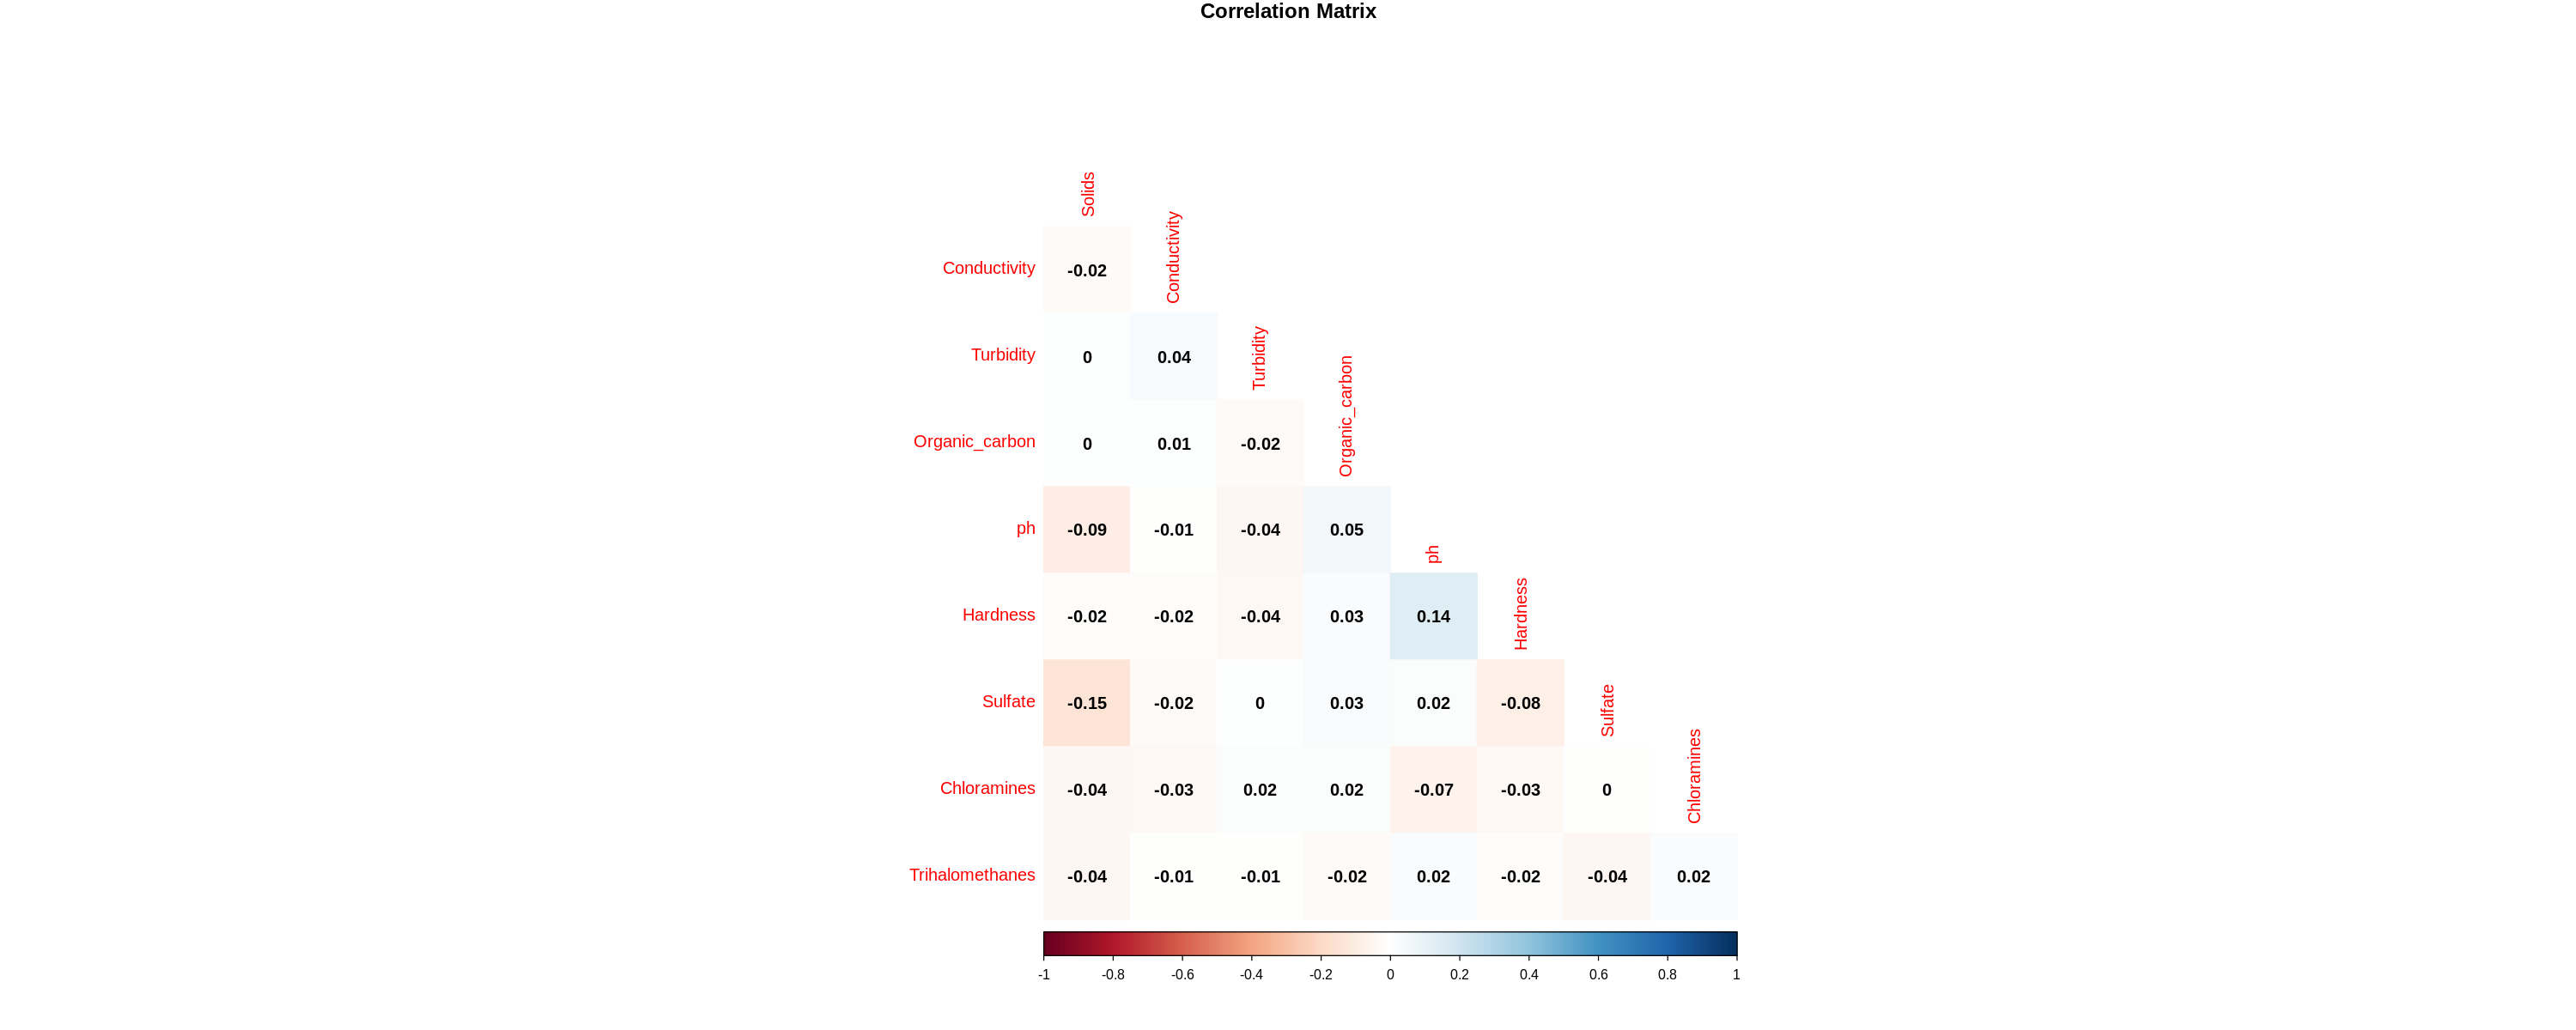

In [19]:
# Plot the above correlation matrix
corrplot(cor_matrix, method = 'color', diag = FALSE, 
         type = "lower", order = "hclust", title = 'Correlation Matrix',
         addCoef.col = "black",
         mar = c(0,0,1,0)) 

## Methods 

A large part of our data analysis is based on finding the compounds in the water that affect its potability the most. We will start our data analysis by first filtering out the rows that have N/A values. To account for the imbalance of the potability label, we plan to apply upsampling to ensure that our dataset values are not affected by a lot of missing values (N/A). We will then standardize the values in our dataset so that we get an accurate model. 

Moreover, we aim to first include all columns in our data analysis and then use the forward selection method to determine the most accurate predictors for our dataset. We decided to use all columns because they all describe the quality and presence of chemicals in the water. For instance, the pH can be a useful predictor for us because extremely high or low levels of pH can make water unsafe from the get-go. The presence of compounds such as solids and sulfate can further affect water quality. Columns such as hardness, turbidity, and conductivity can directly tell us about the properties the water holds. Additionally, the correlation matrix shows that there is no high correlation between any pair of variables, so it is not very obvious which variables are redundant to include.

Next, the best subset of columns will then be analyzed using KNN classification to understand how the predictions are affected by these columns. To find a good value for K, we will be tuning K using values between [1, 100] with a step size of 10 and using 10-fold cross-validation. To visualize the accuracies of the sets of columns used by the forward selection method, we are going to use a line plot to represent the accuracy vs the number of predictors. We will also plot how the accuracy of our model changes with varying K values using another line plot. Moreover, histograms will be used to visualize the distribution of our predictions of potability, and scatterplots will be used to show the relationship between each predictor used and its effect on potability. Finally, we will discuss and reflect on what our results mean in the context of predicting the potability of water in third world countries.


## Outcomes

The histograms and boxplots above show us the frequency of each predictor for the two potability labels which follow similar distributions. Consequently, we can expect that the accuracy of the model will not be very high. However, we can also expect some predictors to have stronger predictive power than others, so there should be a subset of predictors that yields the highest accuracy.

Our data analysis will help Dr. Doe understand which chemical compound’s presence in water is affecting water quality the most. The hazards chemicals pose to water can then be studied and effective remedies to prevent water pollution could be put in place. This study can open doors for further research to determine how one chemical compound/pollutant affects water quality as compared to the presence of natural chemicals in the water. Some questions that may be posed are: How can we sanitize/clean this polluted water without extracting its natural minerals? How can we distribute safe water to children throughout the country? And which age group is affected most by contaminated water? 


### Sources: 

* Dataset retrived from: https://www.kaggle.com/adityakadiwal/water-potability
* Mekonnen, M. M., & Hoekstra, A. Y. (2016). Four billion people facing severe water scarcity. Science Advances, 2(2).         https://doi.org/10.1126/sciadv.1500323
* United Nations. (n.d.). Water. United Nations. Retrieved February 24, 2022, from https://www.un.org/en/global-issues/water 
* U.-W. (n.d.). About United Nations Water. UN-Water. https://www.unwater.org/about-unwater/
* https://www.worldvision.ca/stories/clean-water/cholera-waterborne-disease-facts#:~:text=Types%20of%20waterborne%20diseases%20include,can%20lead%20to%20severe%20dehydration
* Water in developing countries. (n.d.). GAC. https://www.international.gc.ca/world-monde/issues_development-enjeux_developpement/environmental_protection-protection_environnement/water-eau.aspx?lang=eng
* The Water Project. (n.d.). The Water Crisis: The Importance of Clean Water to Health. https://thewaterproject.org/why-water/health

